In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

In [4]:
truth = './data/processed/truth.txt'
pred = './data/processed/predictions.txt'

df_truth = pd.read_csv(truth, header=None, names=['class'])
df_pred = pd.read_csv(pred, header=None, names=['class'])

In [5]:
df_truth, df_pred

(   class
 0   Jedi
 1   Jedi
 2   Sith
 3   Sith
 4   Jedi
 ..   ...
 95  Sith
 96  Sith
 97  Sith
 98  Jedi
 99  Sith
 
 [100 rows x 1 columns],
    class
 0   Sith
 1   Sith
 2   Jedi
 3   Sith
 4   Jedi
 ..   ...
 95  Sith
 96  Jedi
 97  Jedi
 98  Sith
 99  Jedi
 
 [100 rows x 1 columns])

In [60]:
confusion_matrix = np.array([
    [0, 0],
    [0, 0]
])

confusion_matrix
# confusion_matrix[0][0] # TP
# confusion_matrix[1][1] # TN
# confusion_matrix[0][1] # FP
# confusion_matrix[1][0] # FN

array([[0, 0],
       [0, 0]])

In [64]:
# Thinking of Jedi as positive and Sith as negative (binary classification)
for i in range(len(df_pred)):
    if df_truth['class'][i] == 'Jedi' and df_pred['class'][i] == 'Jedi': # TP
        confusion_matrix[0][0] += 1
    elif df_truth['class'][i] == 'Sith' and df_pred['class'][i] == 'Sith': # TN
        confusion_matrix[1][1] += 1
    elif df_truth['class'][i] == 'Jedi' and df_pred['class'][i] == 'Sith': # FP
        confusion_matrix[0][1] += 1
    elif df_truth['class'][i] == 'Sith' and df_pred['class'][i] == 'Jedi': # FN
        confusion_matrix[1][0] += 1

TP = confusion_matrix[0][0]
TN = confusion_matrix[1][1]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]

precision = f'{TP / (TP + FP):.2f}'
recall = f'{TP / (TP + FN):.2f}'

print(precision, recall)
print(confusion_matrix)

0.51 0.45
[[100  96]
 [120  84]]


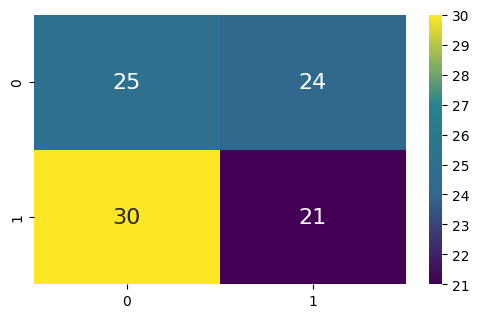

In [58]:
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom", ['#440054', '#31688E', '#27828E', '#FDE724'])

plt.figure(figsize=(6, 3.5))
sns.heatmap(confusion_matrix, annot=True, annot_kws={
  'size': 16
}, cmap=custom_cmap)
plt.show()